# Customer Data Analysis and applying Machine Learning Model(Clustering).

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Importing Data

In [2]:
df = pd.read_csv("F:\\INTERNSAVY INTERNSHIP\\Mall_Customers.csv")

# Data Preprocessing

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.shape

(200, 5)

In [6]:
df.sample(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
58,59,Female,27,46,51
100,101,Female,23,62,41
158,159,Male,34,78,1
57,58,Male,69,44,46
33,34,Male,18,33,92
94,95,Female,32,60,42
4,5,Female,31,17,40
65,66,Male,18,48,59
198,199,Male,32,137,18
20,21,Male,35,24,35


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


# Exploratory Data Analysis

In [12]:
df.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

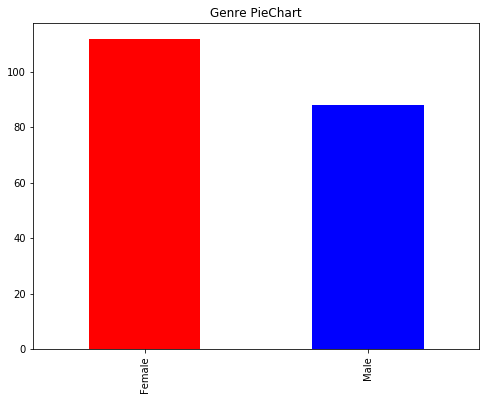

In [13]:
df.Genre.value_counts().plot(kind='bar', title="Genre PieChart", figsize=(8,6), color=["red", "blue"])
plt.show()

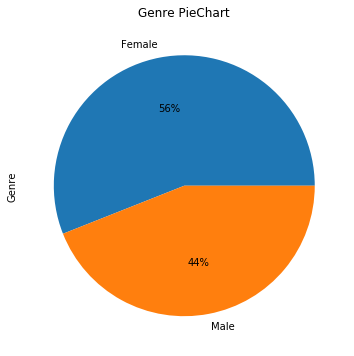

In [14]:
df.Genre.value_counts().plot(kind='pie', autopct='%1.0f%%', title="Genre PieChart", figsize=(8,6))
plt.show()

From the above Bar Chart and Pie Chart we can clearly see that number of female customers is more than number of male customers.

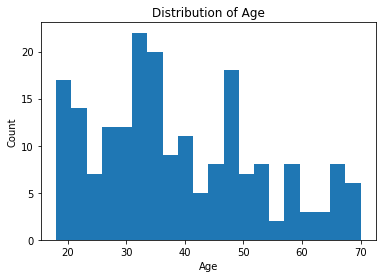

In [15]:
# Visualize the distribution of Age using a histogram
plt.hist(data=df, x='Age', bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

From Histogram we can say that most of the customers are youngsters.

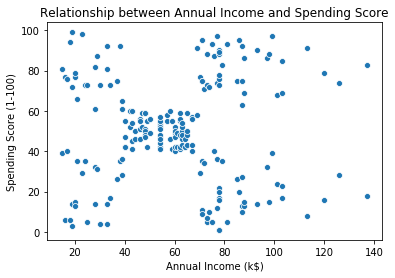

In [17]:
# Visualize the relationship between Annual Income and Spending Score using a scatter plot
import seaborn as sns
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title('Relationship between Annual Income and Spending Score')
plt.show()

From above Scatter plot we can see that there is no correlation between Annual Income and Spending Score.

# Applying Machine Learning Models: Clustering

# 1. K-Means Clustering

In [18]:
X = df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

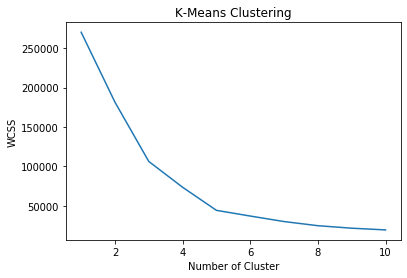

In [19]:
from sklearn.cluster import KMeans
wcss = [] # empty list
for i in range(1,11): # range 1 to 10 implies that between this range any no. of clusters can be formed
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("K-Means Clustering")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

In [25]:
kmeans = KMeans(n_clusters=5, init="k-means++",random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [26]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


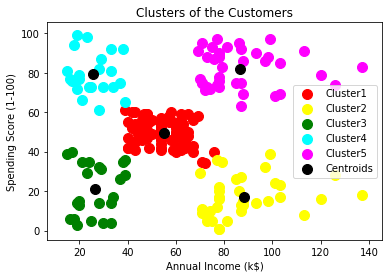

In [28]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'yellow', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster5') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters of the Customers')
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)')
plt.legend() 

plt.show()

# 2. Hierarchical Clustering

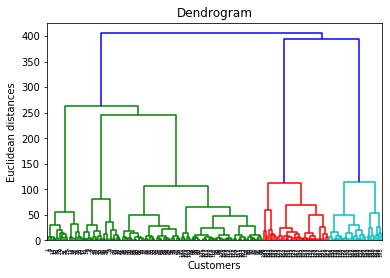

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv("F:\\INTERNSAVY INTERNSHIP\\Mall_Customers.csv")
x = dataset.iloc[:, [3,4]].values
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

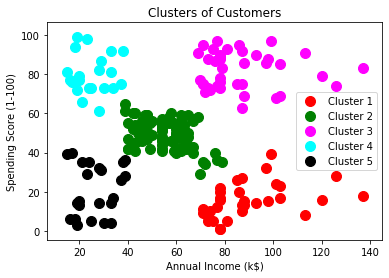

In [55]:
from sklearn.cluster import  AgglomerativeClustering
hc = AgglomerativeClustering (n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0,0], x[y_hc == 0,1], s=100, c='red', label='Cluster 1')
plt.scatter(x[y_hc == 1,0], x[y_hc == 1,1], s=100, c='green', label='Cluster 2')
plt.scatter(x[y_hc == 2,0], x[y_hc == 2,1], s=100, c='magenta', label='Cluster 3')
plt.scatter(x[y_hc == 3,0], x[y_hc == 3,1], s=100, c='cyan', label='Cluster 4')
plt.scatter(x[y_hc == 4,0], x[y_hc == 4,1], s=100, c='black', label='Cluster 5')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

There is some patterning here. Zero correlation though. But you can think of these as customer segments:
   
   1. Low income, low spending score
   2. Low income, high spending score
   3. Mid income, medium spending score
   4. High income, low spending score
   5. High income, high spending score